In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.color import rgb2lab, lab2rgb
from matplotlib import patches as patch
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D


# Pre-Processing

In [2]:
def objects(path = "./Fruits"):
    object  = os.listdir(path)
    return object

name = objects()

def dataset_loader(datatype, imagetype):
    def loadImages(path = "./Fruits/" +str(datatype)+"/"):

        return[os.path.join(path,f) for f in os.listdir(path) if f.endswith(imagetype)]

    filenames = loadImages()
    images = []
    for file in filenames:
        image = cv2.imread(file)
        images.append(image)

    return images

# Feature Extraction

## Color (CIELab Colorspace)

In [ ]:
def LAB_mean(datatype):
    images = dataset_loader(datatype, ".jpg")

    a_ = []
    b_ = []
    hue = []
    for i in range(len(images)):
        img = images[i][:,:,::-1]
        lab = rgb2lab(img)
        a,b = lab[:,:,1].ravel(),lab[:,:,2].ravel()
        a_.append(np.mean(a))
        b_.append(np.mean(b))
        hue.append(np.tan(b/a))
        
    return a_, b_, hue

## Eccentricity

In [4]:

def Ecc(datatype):
    images = dataset_loader(datatype, ".jpg")
    E = []
    for i in range(len(images)):
        img = images[i]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.bitwise_not(img)
        thresh = 0.05
        img = img/255
        img[img<thresh] = 0
        img[img>thresh] = 1
        A = measure.label(img, neighbors=4)
        for region in measure.regionprops(A,coordinates='xy'):
            E.append(region.eccentricity)
            
    return E


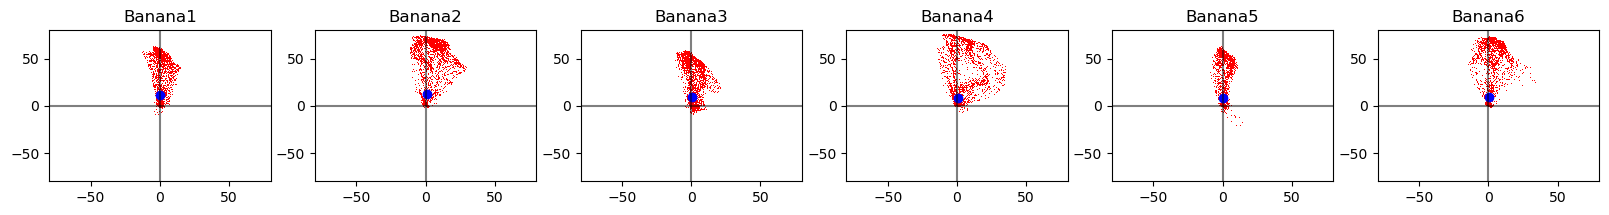

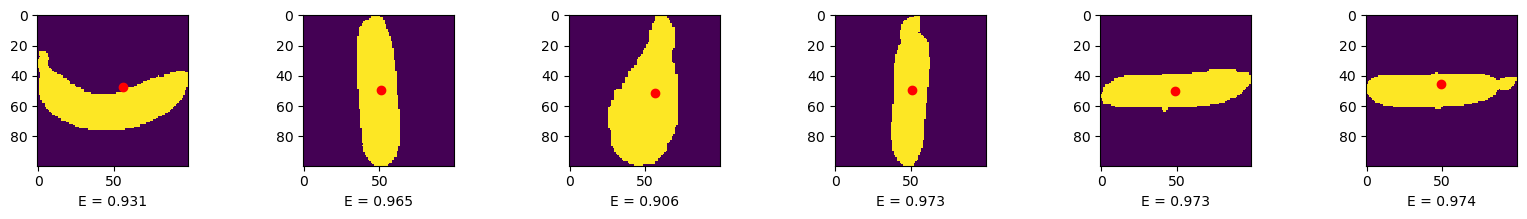

In [5]:
%matplotlib inline
datatype = "Banana"
images = dataset_loader(datatype, ".jpg")
plt.figure(dpi = 100, figsize = [20,2])

for i in range(len(images)):
    plt.subplot(1,len(images),i+1)
    img = images[i][:,:,::-1]
    lab = rgb2lab(img)
    a,b = lab[:,:,1].ravel(),lab[:,:,2].ravel()
    a_ = np.mean(a)
    b_ = np.mean(b)
    plt.plot(a,b,'r,')
    plt.plot(a_,b_,'bo')
    plt.xlim(-80,80)
    plt.ylim(-80,80)
    plt.axhline(0, color = 'k', alpha = 0.5)
    plt.axvline(0, color = 'k', alpha = 0.5)

    plt.title(datatype + str(i+1))
plt.show()

plt.figure(dpi = 100, figsize = [20,2])
E = []
for i in range(len(images)):
    plt.subplot(1,len(images),i+1)

    img = images[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)
    thresh = 0.05
    img = img/255
    img[img<thresh] = 0
    img[img>thresh] = 1
    A = measure.label(img, neighbors=4)
    for region in measure.regionprops(A,coordinates='xy'):
        y, x = region.centroid
        plt.plot(y,x, 'ro')
        plt.imshow(img)
        E.append(region.eccentricity)
        plt.xlabel("E = " + str(np.round(region.eccentricity,3)))
plt.show()
        

# Class Features

c:\users\rene\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


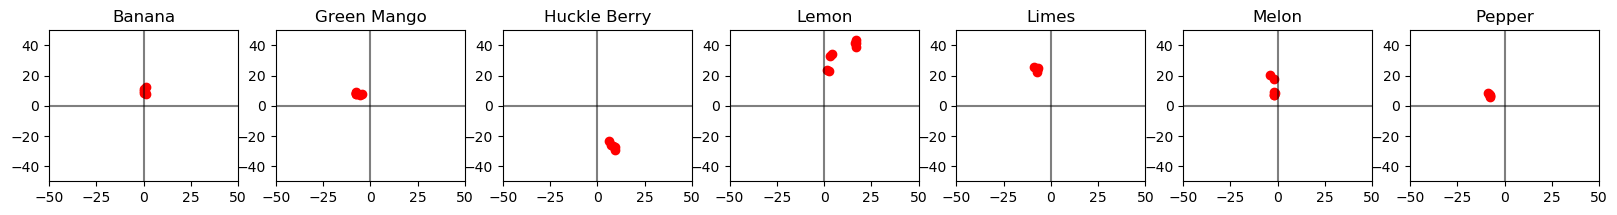

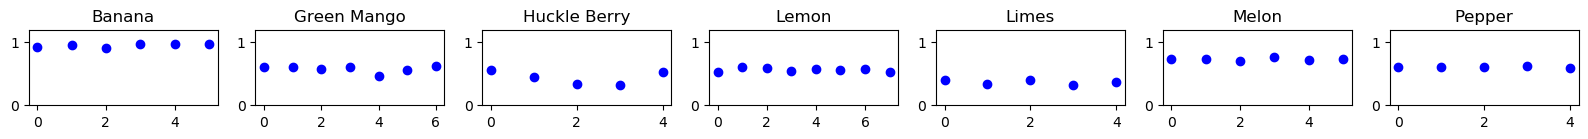

In [6]:
plt.figure(dpi = 100, figsize = [20,2])
A = []
B = []
for i in name:
    a_, b_, hue = LAB_mean(i)
    for a in a_:
        A.append(a)
    for b in b_:
        B.append(b)
    plt.subplot(1,len(name),name.index(i)+1)
    plt.plot(a_,b_,'ro')
    plt.xlim(-50,50)
    plt.ylim(-50,50)
    plt.title(i)
    plt.axhline(0, color = 'k', alpha = 0.5)
    plt.axvline(0, color = 'k', alpha = 0.5)
plt.show()

E = []
plt.figure(dpi = 100, figsize = [20,1])
for i in name:
    ecc = Ecc(i)
    for e in ecc:
        E.append(e)
    plt.subplot(1,len(name),name.index(i)+1)
    plt.plot(ecc,'bo')
    plt.ylim(0,1.2)
    plt.title(i)
plt.show()

# Clustering

<IPython.core.display.Javascript object>


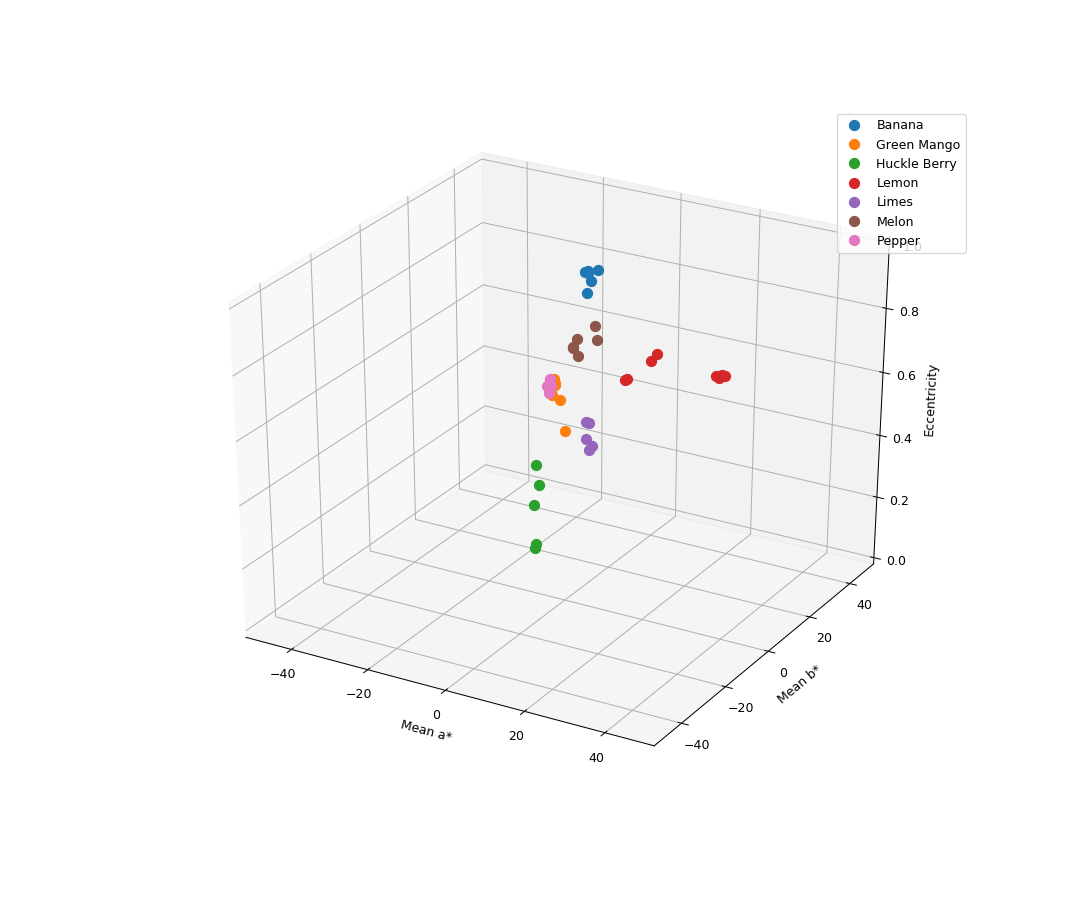

c:\users\rene\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [13]:
%matplotlib notebook

fig = plt.figure(figsize = [12,10])
ax = fig.add_subplot(111, projection='3d')

for fruit in name:

    a_, b_, hue = LAB_mean(fruit)
    ecc = Ecc(fruit)
    ax.plot(a_, b_, ecc, 'o',ms = 8, label = fruit)
ax.legend()
ax.set_xlabel('Mean a*')
ax.set_ylabel('Mean b*')
ax.set_zlabel('Eccentricity')
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_zlim(0,1)
#ax.view_init(azim=90

plt.show()

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = [10,10])
for fruit in name:
    a_, b_, hue = LAB_mean(fruit)
    ecc = Ecc(fruit)
    plt.plot(hue, ecc, 'o',ms = 8, label = fruit)
plt.legend()
plt.xlabel('Hue')
plt.ylabel('Eccentricity')
plt.ylim(0,1)

c:\users\rene\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [11]:
help(np.arctan)

Help on ufunc object:

arctan = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate arra